In [9]:
import pandas as pd

data = pd.read_csv('clean_data_9000.csv')

data['SAT_score_range'] = pd.cut(data['SATMT75'], bins=[400, 500, 600, 700, 800], labels=['400-500', '500-600', '600-700', '700-800'])
data['ACT_score_range'] = pd.cut(data['ACTCM75'], bins=[10, 20, 25, 30, 36], labels=['10-20', '20-25', '25-30', '30-36'])

# Creating a categorical variable for median earnings
data['earnings_category'] = pd.cut(data['MD_EARN_WNE_P10'], bins=[0, 30000, 50000, 70000, 100000, float('inf')], labels=['<30K', '30-50K', '50-70K', '70-100K', '>100K'])

# Select and combine features into transactions
transactions = data[['SAT_score_range', 'ACT_score_range', 'earnings_category']].apply(lambda x: x.dropna().tolist(), axis=1)

In [20]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Encode the dataset
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Eclat: we use apriori but only with support parameter, effectively making it Eclat
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

print(frequent_itemsets)

     support itemsets
0   0.072306   (10.0)
1   0.104599   (11.0)
2   0.105904   (12.0)
3   0.102751   (13.0)
4   0.095248   (14.0)
5   0.078069   (15.0)
6   0.070566   (16.0)
7   0.071436   (17.0)
8   0.061977   (18.0)
9   0.055888   (19.0)
10  0.054366   (20.0)
11  0.054257   (21.0)
12  0.076112   (22.0)
13  0.105360   (23.0)
14  0.109818   (24.0)
15  0.125584   (25.0)
16  0.115799   (26.0)
17  0.093617   (27.0)
18  0.076003   (28.0)
19  0.062085   (29.0)
20  0.051973  (520.0)
21  0.059693  (530.0)
22  0.076873  (540.0)
23  0.089160  (550.0)
24  0.094161  (560.0)
25  0.103186  (570.0)
26  0.108840  (580.0)
27  0.112211  (590.0)
28  0.101337  (600.0)
29  0.092965  (610.0)
30  0.089377  (620.0)
31  0.079374  (630.0)
32  0.067957  (640.0)
33  0.057410  (650.0)
34  0.051865  (660.0)
35  0.052300    (9.0)


In [12]:
from mlxtend.frequent_patterns import association_rules

# Review frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules (only if you want to explore implications, though Eclat mainly focuses on support)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)  # Adjust threshold as needed
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Frequent Itemsets:
     support                  itemsets
0   0.057954                   (10-20)
1   0.421877                   (20-25)
2   0.386213                   (25-30)
3   0.133848                   (30-36)
4   0.220942                  (30-50K)
5   0.060672                 (400-500)
6   0.739263                  (50-70K)
7   0.524193                 (500-600)
8   0.308361                 (600-700)
9   0.105469                 (700-800)
10  0.128520           (30-50K, 20-25)
11  0.288681           (20-25, 50-70K)
12  0.368164          (20-25, 500-600)
13  0.069805           (30-50K, 25-30)
14  0.306622           (50-70K, 25-30)
15  0.130804          (25-30, 500-600)
16  0.247146          (600-700, 25-30)
17  0.107535           (30-36, 50-70K)
18  0.099054          (700-800, 30-36)
19  0.154398         (30-50K, 500-600)
20  0.364793         (50-70K, 500-600)
21  0.251060         (600-700, 50-70K)
22  0.081440         (700-800, 50-70K)
23  0.115038  (30-50K, 20-25, 500-600)
24  0.

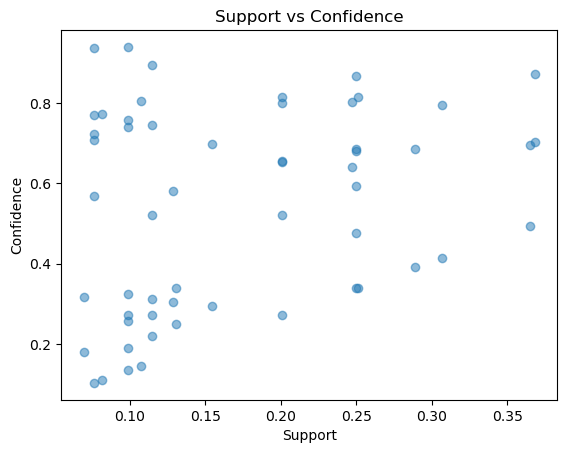

In [13]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [14]:
top_itemsets = frequent_itemsets.nlargest(10, 'support')
print(top_itemsets)

     support           itemsets
6   0.739263           (50-70K)
7   0.524193          (500-600)
1   0.421877            (20-25)
2   0.386213            (25-30)
12  0.368164   (20-25, 500-600)
20  0.364793  (50-70K, 500-600)
8   0.308361          (600-700)
14  0.306622    (50-70K, 25-30)
11  0.288681    (20-25, 50-70K)
21  0.251060  (600-700, 50-70K)


In [23]:
transactions = data[['SATVR75', 'SATMT75', 'ACTCM75', 'STUFACR']].apply(lambda row: [str(item) for item in row], axis=1).tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Use ECLAT to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

     support itemsets
0   0.104599   (11.0)
1   0.105904   (12.0)
2   0.102751   (13.0)
3   0.105360   (23.0)
4   0.109818   (24.0)
5   0.125584   (25.0)
6   0.115799   (26.0)
7   0.103186  (570.0)
8   0.108840  (580.0)
9   0.112211  (590.0)
10  0.101337  (600.0)


In [24]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


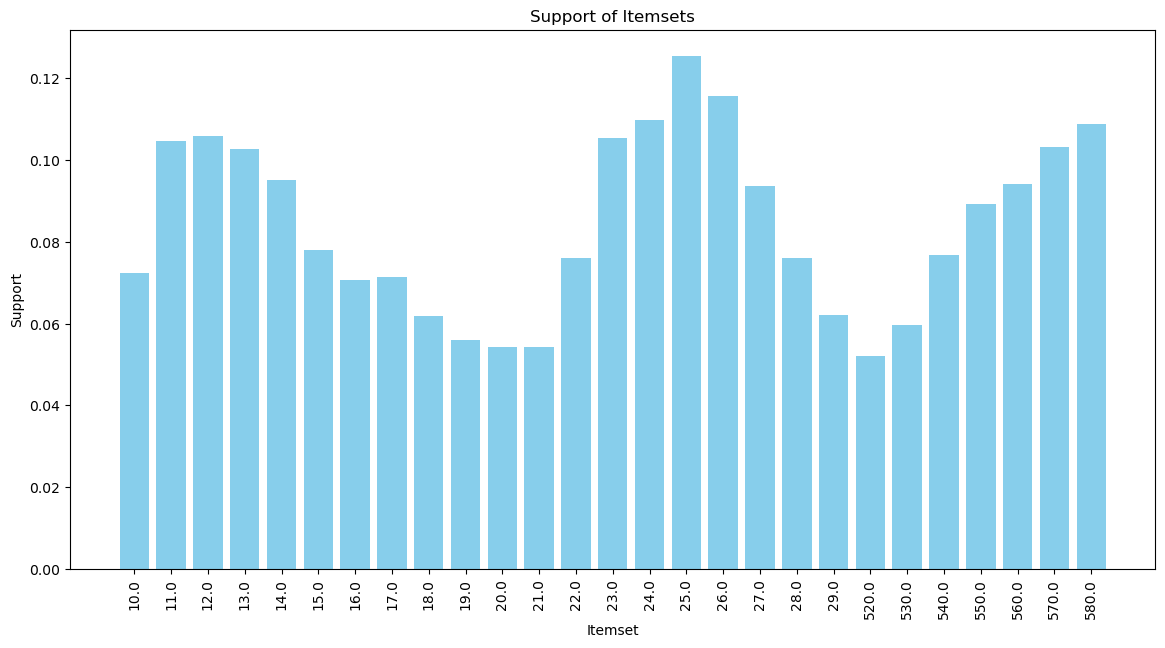

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the itemsets and their support values
data = pd.DataFrame({
    'itemset': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0],
    'support': [0.072306, 0.104599, 0.105904, 0.102751, 0.095248, 0.078069, 0.070566, 0.071436, 0.061977, 0.055888, 0.054366, 0.054257, 0.076112, 0.105360, 0.109818, 0.125584, 0.115799, 0.093617, 0.076003, 0.062085, 0.051973, 0.059693, 0.076873, 0.089160, 0.094161, 0.103186, 0.108840]
})

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size (optional)
plt.bar(data['itemset'].astype(str), data['support'], color='skyblue')  # Create a bar plot
plt.xlabel('Itemset')  # X-axis label
plt.ylabel('Support')  # Y-axis label
plt.title('Support of Itemsets')  # Title of the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()
